# 20-1 ESAA 프로젝트: 2017~2019 3개년 전국 아파트 실거래가 분석

# 1. 개요

In [1]:
'''
본 데이터는 한국감정원 아파트 거래현황 자료의 2017.10.01 ~ 2019.12.31 데이터입니다. 
전반적인 데이터를 전처리 및 시각화 한 후
Random Forest 모델을 적용해 지역별(구 기준), ?별 제곱미터당 거래가격을 예측해보는 회귀모델을 생성 해보았습니다.
'''

'\n본 데이터는 한국감정원 아파트 거래현황 자료의 2017.10.01 ~ 2019.12.31 데이터입니다. \n전반적인 데이터를 전처리 및 시각화 한 후\nRandom Forest 모델을 적용해 지역별(구 기준), ?별 제곱미터당 거래가격을 예측해보는 회귀모델을 생성 해보았습니다.\n'

In [2]:
'''
검색조건 계약일자 : 20170101 ~ 20191231 
실거래구분 : 아파트(매매) 
주소구분 : 지번주소 
시도 : 전체
시군구 : 전체 
읍면동 : 전체 
면적 : 전체 
금액선택 : 전체
'''

'\n검색조건 계약일자 : 20170101 ~ 20191231 \n실거래구분 : 아파트(매매) \n주소구분 : 지번주소 \n시도 : 전체\n시군구 : 전체 \n읍면동 : 전체 \n면적 : 전체 \n금액선택 : 전체\n'

# 2. 탐색적 자료분석 (EDA)

## 1. 필요한 패키지

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import matplotlib.font_manager as fm
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
%matplotlib inline

from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:      
# Mac 인 경우
    rc('font', family='AppleGothic')

## 2. 데이터 불러오기 및 데이터 파악

In [4]:
# 데이터 불러오기
apt2017_1 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-1_apt.csv', thousands = ',') # thousands = ',' : 천 단위 자리 구분 기호 없애고 가져오기
apt2017_2 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-2_apt.csv', thousands = ',')
apt2017_3 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-3_apt.csv', thousands = ',')
apt2017_4 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-4_apt.csv', thousands = ',')
apt2017_5 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-5_apt.csv', thousands = ',')
apt2017_6 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-6_apt.csv', thousands = ',')
apt2017_7 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-7_apt.csv', thousands = ',')
apt2017_8 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-8_apt.csv', thousands = ',')
apt2017_9 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-9_apt.csv', thousands = ',')
apt2017_10 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-10_apt.csv', thousands = ',')
apt2017_11 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-11_apt.csv', thousands = ',')
apt2017_12 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-12_apt.csv', thousands = ',')

apt2018_1 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-1_apt.csv', thousands = ',')
apt2018_2 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-2_apt.csv', thousands = ',')
apt2018_3 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-3_apt.csv', thousands = ',')
apt2018_4 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-4_apt.csv', thousands = ',')
apt2018_5 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-5_apt.csv', thousands = ',')
apt2018_6 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-6_apt.csv', thousands = ',')
apt2018_7 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-7_apt.csv', thousands = ',')
apt2018_8 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-8_apt.csv', thousands = ',')
apt2018_9 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-9_apt.csv', thousands = ',')
apt2018_10 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-10_apt.csv', thousands = ',')
apt2018_11 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-11_apt.csv', thousands = ',')
apt2018_12 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-12_apt.csv', thousands = ',')

apt2019_1 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-1_apt.csv', thousands = ',')
apt2019_2 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-2_apt.csv', thousands = ',')
apt2019_3 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-3_apt.csv', thousands = ',')
apt2019_4 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-4_apt.csv', thousands = ',')
apt2019_5 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-5_apt.csv', thousands = ',')
apt2019_6 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-6_apt.csv', thousands = ',')
apt2019_7 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-7_apt.csv', thousands = ',')
apt2019_8 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-8_apt.csv', thousands = ',')
apt2019_9 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-9_apt.csv', thousands = ',')
apt2019_10 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-10_apt.csv', thousands = ',')
apt2019_11 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-11_apt.csv', thousands = ',')
apt2019_12 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-12_apt.csv', thousands = ',')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# 연도별로 데이터 합치기
apt2017 = pd.concat([apt2017_1, apt2017_2, apt2017_3, apt2017_4, apt2017_5, apt2017_6, apt2017_7, apt2017_8, apt2017_9, apt2017_10, apt2017_11, apt2017_12])
apt2018 = pd.concat([apt2018_1, apt2018_2, apt2018_3, apt2018_4, apt2018_5, apt2018_6, apt2018_7, apt2018_8, apt2018_9, apt2018_10, apt2018_11, apt2018_12])
apt2019 = pd.concat([apt2019_1, apt2019_2, apt2019_3, apt2019_4, apt2019_5, apt2019_6, apt2019_7, apt2019_8, apt2019_9, apt2019_10, apt2019_11, apt2019_12])

In [6]:
apt2017.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.8000,201701,10,12400,8,1997,경강로2539번길 8
1,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201701,3,23000,13,2005,경강로2539번길 22
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,59.9900,201701,4,15800,9,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,59.9900,201701,21,14000,1,2005,경강로2539번길 22
4,강원도 강릉시 교동,1983,1983,0,강릉교동롯데캐슬2단지,84.9855,201701,5,27250,11,2009,화부산로111번길 24


In [7]:
apt2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570324 entries, 0 to 40192
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       570324 non-null  object 
 1   번지        570232 non-null  object 
 2   본번        570324 non-null  object 
 3   부번        570324 non-null  int64  
 4   단지명       570324 non-null  object 
 5   전용면적(㎡)   570324 non-null  float64
 6   계약년월      570324 non-null  int64  
 7   계약일       570324 non-null  int64  
 8   거래금액(만원)  570324 non-null  int64  
 9   층         570324 non-null  int64  
 10  건축년도      570324 non-null  int64  
 11  도로명       570324 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 56.6+ MB


In [8]:
# 2017년도 데이터 결측치 개수 확인
apt2017.isnull().sum()

시군구          0
번지          92
본번           0
부번           0
단지명          0
전용면적(㎡)      0
계약년월         0
계약일          0
거래금액(만원)     0
층            0
건축년도         0
도로명          0
dtype: int64

In [9]:
# 2018년도 데이터 결측치 개수 확인
apt2018.isnull().sum()

시군구          0
번지          43
본번           0
부번           0
단지명          0
전용면적(㎡)      0
계약년월         0
계약일          0
거래금액(만원)     0
층            0
건축년도         0
도로명          0
dtype: int64

In [10]:
# 2019년도 데이터 결측치 개수 확인
apt2019.isnull().sum()

시군구          0
번지          52
본번           0
부번           0
단지명          0
전용면적(㎡)      0
계약년월         0
계약일          0
거래금액(만원)     0
층            0
건축년도         0
도로명          0
dtype: int64

## 3. 데이터 처리

(1) 3개년 데이터 합치기

In [11]:
apt171819 = pd.concat([apt2017, apt2018, apt2019]) 

(2) 시군구 변수를 시-군-구로 분리

In [12]:
apt171819['도'] = apt171819['시군구'].str.split(' ').str[0]
apt2017['도'] = apt2017['시군구'].str.split(' ').str[0]
apt2018['도'] = apt2018['시군구'].str.split(' ').str[0]
apt2019['도'] = apt2019['시군구'].str.split(' ').str[0]
apt171819['시/구'] = apt171819['시군구'].str.split(' ').str[1]
apt2017['시/구'] = apt2017['시군구'].str.split(' ').str[1]
apt2018['시/구'] = apt2018['시군구'].str.split(' ').str[1]
apt2019['시/구'] = apt2019['시군구'].str.split(' ').str[1]
apt171819['동'] = apt171819['시군구'].str.split(' ').str[2]
apt2017['동'] = apt2017['시군구'].str.split(' ').str[2]
apt2018['동'] = apt2018['시군구'].str.split(' ').str[2]
apt2019['동'] = apt2019['시군구'].str.split(' ').str[2]
apt171819['동']

0        견소동
1        견소동
2        견소동
3        견소동
4         교동
        ... 
70396    호암동
70397    호암동
70398    호암동
70399    호암동
70400    호암동
Name: 동, Length: 1610485, dtype: object

(3) 계약년월을 계약연도-계약월로 분리

In [13]:
apt171819['계약년월1'] = apt171819['계약년월'].astype(str)
apt2017['계약년월1'] = apt2017['계약년월'].astype(str)
apt2018['계약년월1'] = apt2018['계약년월'].astype(str)
apt2019['계약년월1'] = apt2019['계약년월'].astype(str)
apt171819['계약연도'] = apt171819['계약년월1'].str[0:4]
apt2017['계약연도'] = apt2017['계약년월1'].str[0:4]
apt2018['계약연도'] = apt2018['계약년월1'].str[0:4]
apt2019['계약연도'] = apt2019['계약년월1'].str[0:4]
apt171819['계약월'] = apt171819['계약년월1'].str[4:]
apt2017['계약월'] = apt2017['계약년월1'].str[4:]
apt2018['계약월'] = apt2018['계약년월1'].str[4:]
apt2019['계약월'] = apt2019['계약년월1'].str[4:]
apt171819['계약월']

0        01
1        01
2        01
3        01
4        01
         ..
70396    12
70397    12
70398    12
70399    12
70400    12
Name: 계약월, Length: 1610485, dtype: object

## 4. 데이터 시각화

데이터 시각화에서는 다음과 같이 데이터를 시각화 해보았습니다.

- 연도별 거래금액의 평균 / 연도별 거래량 많은 시,도
- 월별 거래량 
- 구별 거래량 / 평균 거래금액 / ㎡당 금액
- 건축연도별 거래량 / 평균 거래금액 / ㎡당 금액
- 층별 거래량 / 평균 거래금액
- 전용면적별(평수별) 거래량

- 수도권 / 비수도권 간 전반적 비교
- 서울 / 경기 지역 간 비교
- 건축연도 2000년 전후로 거래금액 비교

### (1) 연도별 거래량 / 거래금액 평균 / 연도별 거래량 많은 시,도

In [14]:
apt2017["거래금액(만원)"].mean() # 2017년 => 약 3억1천만원

31351.560281524187

In [15]:
apt2017["거래금액(만원)"].count() # 2017년 => 약 57만건

570324

In [16]:
apt2018["거래금액(만원)"].mean() # 2018년 => 약 3억2천만원

32423.816074368813

In [17]:
apt2018["거래금액(만원)"].count() # 2018년 => 약 50.5만건

505911

In [18]:
apt2019["거래금액(만원)"].mean() # 2019년 => 약 3억4천만원

34749.826863827795

In [19]:
apt2019["거래금액(만원)"].count() # 2019년 => 약 53만건

534250

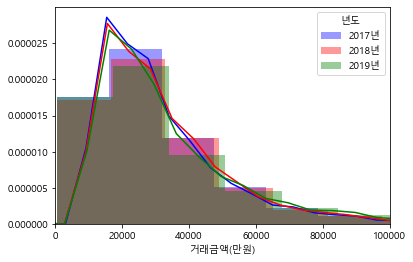

In [20]:
sns.distplot(apt2017["거래금액(만원)"], color="blue", label="2017년")
sns.distplot(apt2018["거래금액(만원)"], color="red", label="2018년")
sns.distplot(apt2019["거래금액(만원)"], color="green", label="2019년")

plt.xlim(0,100000)
plt.legend(title="년도")
plt.show()

2017, 2018, 2019년도의 거래금액 분포 자체는 비슷함. 그런데 자세히 보면 2017, 2018년도에는 약 6억 정도까지의 금액으로 거래된 아파트들이 2019년보다 비교적 많음. 2019년은 2017, 2018년보다 높은 가격대에 거래된 아파트의 수가 많음.

시간이 지날수록 거래금액 평균이 조금씩 증가하며, 연간 50 ~ 60만건 정도 거래됨.

In [21]:
#시,도별 거래량 변수 생성
apt2017['시도별거래량'] = apt2017.groupby(['도']).도.transform('count')
apt2018['시도별거래량'] = apt2018.groupby(['도']).도.transform('count')
apt2019['시도별거래량'] = apt2019.groupby(['도']).도.transform('count')

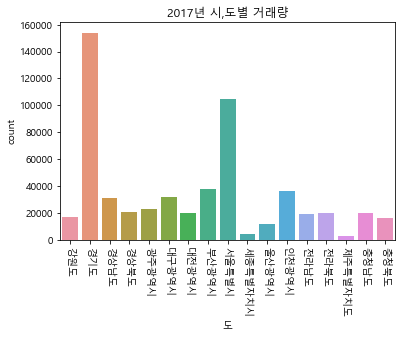

In [22]:
#2017년 그래프 그리기
sns.countplot("도",data=apt2017)
plt.title("2017년 시,도별 거래량")
plt.xticks(rotation = -90)
plt.show()

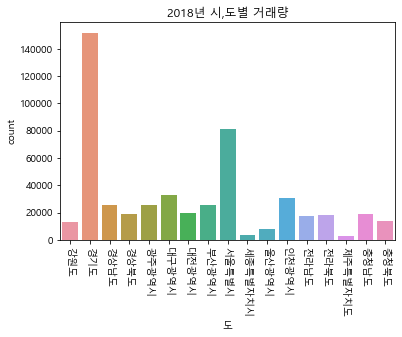

In [23]:
#2018년 그래프 그리기
sns.countplot(x="도", data=apt2018)
plt.title("2018년 시,도별 거래량")
plt.xticks(rotation = -90)
plt.show()

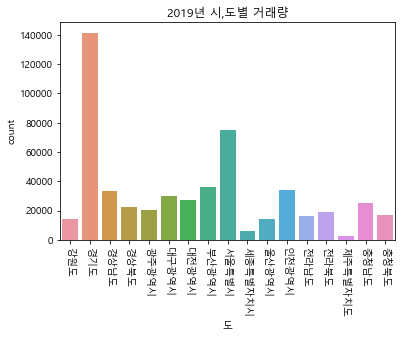

In [24]:
#2019년 그래프 그리기
sns.countplot(x="도", data=apt2019)
plt.title("2019년 시,도별 거래량")
plt.xticks(rotation = -90)
plt.show()

3개년 모두 경기도와서울특별시의 거래량이 가장 많았으며, 세종특별자치시와 제주특별자치도의 거래량이 가장 적었음.

### (2) 월별 거래량

In [25]:
volume_by_month = apt171819.groupby('계약월').count()
volume_by_month['당월 계약수'] = volume_by_month['거래금액(만원)']
volume_by_month = volume_by_month.loc[:,['당월 계약수']]
volume_by_month = volume_by_month.sort_values('당월 계약수', ascending=False)
volume_by_month

,당월 계약수
계약월,
11,148971
10,148299
08,143473
07,143435
09,142119
03,139852
06,139782
12,137454
05,130748


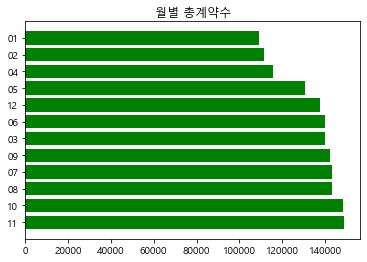

In [26]:
plt.title("월별 총계약수")
plt.barh(volume_by_month.index, volume_by_month['당월 계약수'], color='green')
plt.show()

In [27]:
apt2017.groupby(apt2017['계약월'])['계약년월'].count().sort_values(ascending=False)

계약월
06    62632
07    61709
05    58837
03    51242
04    47688
09    47247
08    45227
11    43933
02    41852
12    40193
10    39636
01    30128
Name: 계약년월, dtype: int64

In [28]:
apt2018.groupby(apt2018['계약월'])['계약년월'].count().sort_values(ascending=False)

계약월
08    56304
03    55215
09    50857
01    50677
10    43986
02    43503
06    38781
05    36816
07    36513
04    35665
11    30734
12    26860
Name: 계약년월, dtype: int64

In [29]:
apt2019.groupby(apt2019['계약월'])['계약년월'].count().sort_values(ascending=False)

계약월
11    74304
12    70401
10    64677
07    45213
09    44015
08    41942
06    38369
05    35095
03    33395
04    32306
01    28401
02    26132
Name: 계약년월, dtype: int64

11, 10, 8, 7월의 거래량이 가장 많으나, 연도별로 순서가 다른 것으로 보아 계약 월이 거래량에 큰 영향을 미치는 것은 아닌 것으로 보임. 

### (3) 구별 거래량 / 평균 거래금액 / ㎡당 금액

In [30]:
volume_by_sigu = apt171819.groupby(['시/구'])['거래금액(만원)'].count().sort_values(ascending=False)
volume_by_sigu 

시/구
서구     63027
북구     55463
동구     31474
남구     31414
부천시    27047
       ...  
영양군       36
소정면       23
전동면       15
울릉군        9
신안군        1
Name: 거래금액(만원), Length: 248, dtype: int64

전국 각도에 동서남북구가 있기 때문에 거래량은 많으나 구분할 수 없음

In [31]:
mean_price_by_gu = apt171819.groupby('시/구').mean()
mean_price_by_gu['구별 평균거래가'] = mean_price_by_gu['거래금액(만원)']
mean_price_by_gu = mean_price_by_gu.loc[:,['구별 평균거래가']]
mean_price_by_gu = mean_price_by_gu.sort_values('구별 평균거래가', ascending=False)

# top 10
mean_price_by_gu_top10 = mean_price_by_gu.iloc[:10]
mean_price_by_gu_top10

,구별 평균거래가
시/구,
강남구,149015.261770
서초구,140132.769003
용산구,127033.021816
송파구,99544.650690
과천시,97342.745044
성동구,80254.320578
광진구,78193.929780
마포구,77013.779386
성남분당구,74552.339188


강남구 14억 9천만원, 서초구 14억, 용산구 12억 7천만원 등 (집 크기 고려 안했을때)

In [32]:
apt171819["면적당거래금액"] = apt171819["거래금액(만원)"] / apt171819["전용면적(㎡)"]

mean_price_per_square = apt171819.groupby('시/구').mean()
mean_price_per_square['전용면적(㎡)당 평균거래가'] = mean_price_per_square['면적당거래금액']
mean_price_per_square = mean_price_per_square.loc[:,['전용면적(㎡)당 평균거래가']]
mean_price_per_square = mean_price_per_square.sort_values('전용면적(㎡)당 평균거래가', ascending=False)

# top 10
mean_price_per_square_top10 = mean_price_per_square.iloc[:10]
mean_price_per_square_top10

,전용면적(㎡)당 평균거래가
시/구,
강남구,1697.554869
서초구,1441.527451
과천시,1298.422019
송파구,1201.463354
용산구,1187.955672
성동구,1017.322081
마포구,995.025356
광진구,928.191924
동작구,874.165253


㎡당 가격 강남구 1700만원, 서초구 1440만원, 과천시 1300만원. 평당 가격 계산하려면 ㎡당 가격에 3.3 곱해야함

### (4) 건축연도별 거래량 / 평균 거래금액 / ㎡당 금액

In [33]:
volume_by_cnstr_year = apt171819.groupby('건축년도').count()
volume_by_cnstr_year['건축년도별 거래량'] = volume_by_cnstr_year['거래금액(만원)']
volume_by_cnstr_year = volume_by_cnstr_year.loc[:,['건축년도별 거래량']]
volume_by_cnstr_year = volume_by_cnstr_year.sort_values('건축년도별 거래량', ascending=False)

# top 10
volume_by_cnstr_year_top10 = volume_by_cnstr_year.iloc[:10]
volume_by_cnstr_year_top10

,건축년도별 거래량
건축년도,
1997,67577
1994,66400
2004,62747
1998,61996
1995,61578
1996,59549
1999,58698
2000,56919
2003,56874


In [34]:
mean_price_per_square_cnstr_year = apt171819.groupby('건축년도').mean()
mean_price_per_square_cnstr_year['건축년도별 ㎡당 금액'] = mean_price_per_square_cnstr_year['면적당거래금액']
mean_price_per_square_cnstr_year = mean_price_per_square_cnstr_year.loc[:,['건축년도별 ㎡당 금액']]
mean_price_per_square_cnstr_year = mean_price_per_square_cnstr_year.sort_values('건축년도별 ㎡당 금액', ascending=False)

# top 10
mean_price_per_square_cnstr_year_top10 = mean_price_per_square_cnstr_year.iloc[:10]
mean_price_per_square_cnstr_year_top10

,건축년도별 ㎡당 금액
건축년도,
1973,1915.087821
1966,985.894097
1965,968.654767
2020,932.221168
1977,887.774085
1982,878.285019
1974,843.278909
1978,842.108022
1971,830.088547


In [35]:
mean_price_per_cnstr_year = apt171819.groupby('건축년도').mean()
mean_price_per_cnstr_year['건축년도별 거래가격 평균'] = mean_price_per_cnstr_year['거래금액(만원)']
mean_price_per_cnstr_year = mean_price_per_cnstr_year.loc[:,['건축년도별 거래가격 평균']]
mean_price_per_cnstr_year = mean_price_per_cnstr_year.sort_values('건축년도별 거래가격 평균', ascending=False)

# top 10
mean_price_per_cnstr_year_top10 = mean_price_per_cnstr_year.iloc[:10]
mean_price_per_cnstr_year_top10

,건축년도별 거래가격 평균
건축년도,
1973,219004.012048
1978,77464.982501
1976,76372.339638
1971,74474.652997
1974,69250.007092
1977,65545.783113
1979,59048.420227
1975,58195.606982
1982,51282.298896


#### 건축년도 2000년 전후 비교

In [36]:
apt171819['건축연도']=0
apt171819.loc[(apt171819['건축년도'] < 2000), '건축연도'] = '2000년 이전 건축'
apt171819.loc[(apt171819['건축년도'] >= 2000), '건축연도'] = '2000년 이후 건축'

meanprice_2000_contrast = apt171819.groupby('건축연도').mean()
meanprice_2000_contrast['평균 가격'] = meanprice_2000_contrast['거래금액(만원)']
meanprice_2000_contrast = meanprice_2000_contrast.loc[:,['평균 가격']]
meanprice_2000_contrast

,평균 가격
건축연도,
2000년 이전 건축,26935.610612
2000년 이후 건축,37584.821324


<function matplotlib.pyplot.show(*args, **kw)>

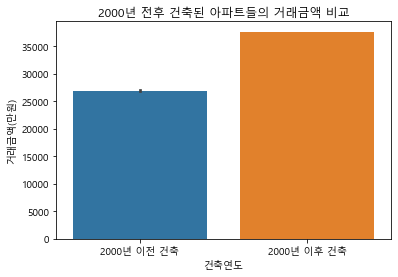

In [37]:
# 2000년 전후 건축된 아파트들의 거래금액 비교
sns.barplot(x="건축연도", y="거래금액(만원)", data=apt171819)
plt.title("2000년 전후 건축된 아파트들의 거래금액 비교")
plt.xlabel('건축연도')
plt.ylabel('거래금액(만원)')
plt.show

### (5) 층별 거래량 / 평균 거래금액

In [38]:
volume_by_floor = apt171819.groupby('층').count()
volume_by_floor['층별거래량'] = volume_by_floor['시군구']
volume_by_floor = volume_by_floor.loc[:,['층별거래량']]
volume_by_floor = volume_by_floor.sort_values('층별거래량', ascending=False)

# top 10
volume_by_floor_top10 = volume_by_floor.iloc[:10]
volume_by_floor_top10

,층별거래량
층,
5,117730
4,116449
3,114232
2,108988
1,97946
6,96017
7,91673
8,90466
9,88826


In [39]:
## 5층 단위로 그룹화

# 2017 새로운 열을 추가함
apt2017['floor_group'] = apt2017['층']

# floor_group은 문자열로 바꿔주기
apt2017['floor_group'] = apt2017['floor_group'].astype(str)

apt2017.loc[apt2017['층'] <= 0, 'floor_group'] = "지하"
apt2017.loc[(apt2017['층'] > 0) & (apt2017['층'] <= 5), 'floor_group'] = "1~5층"
apt2017.loc[(apt2017['층'] > 5) & (apt2017['층'] <= 10), 'floor_group'] = "6~10층"
apt2017.loc[(apt2017['층'] > 10) & (apt2017['층'] <= 15), 'floor_group'] = "11~15층"
apt2017.loc[(apt2017['층'] > 15) & (apt2017['층'] <= 20), 'floor_group'] = "16~20층"
apt2017.loc[(apt2017['층'] > 20) & (apt2017['층'] <= 25), 'floor_group'] = "21~25층"
apt2017.loc[(apt2017['층'] > 25) & (apt2017['층'] <= 30), 'floor_group'] = "26~30층"
apt2017.loc[apt2017['층'] > 30, 'floor_group'] = "31층 이상"

# 2018 새로운 열을 추가함
apt2018['floor_group'] = apt2018['층']

# floor_group은 문자열로 바꿔주기
apt2018['floor_group'] = apt2018['floor_group'].astype(str)

apt2018.loc[apt2018['층'] <= 0, 'floor_group'] = "지하"
apt2018.loc[(apt2018['층'] > 0) & (apt2018['층'] <= 5), 'floor_group'] = "1~5층"
apt2018.loc[(apt2018['층'] > 5) & (apt2018['층'] <= 10), 'floor_group'] = "6~10층"
apt2018.loc[(apt2018['층'] > 10) & (apt2018['층'] <= 15), 'floor_group'] = "11~15층"
apt2018.loc[(apt2018['층'] > 15) & (apt2018['층'] <= 20), 'floor_group'] = "16~20층"
apt2018.loc[(apt2018['층'] > 20) & (apt2018['층'] <= 25), 'floor_group'] = "21~25층"
apt2018.loc[(apt2018['층'] > 25) & (apt2018['층'] <= 30), 'floor_group'] = "26~30층"
apt2018.loc[apt2018['층'] > 30, 'floor_group'] = "31층 이상"

# 2019 새로운 열을 추가함
apt2019['floor_group'] = apt2019['층']

# floor_group은 문자열로 바꿔주기
apt2019['floor_group'] = apt2019['floor_group'].astype(str)

apt2019.loc[apt2019['층'] <= 0, 'floor_group'] = "지하"
apt2019.loc[(apt2019['층'] > 0) & (apt2019['층'] <= 5), 'floor_group'] = "1~5층"
apt2019.loc[(apt2019['층'] > 5) & (apt2019['층'] <= 10), 'floor_group'] = "6~10층"
apt2019.loc[(apt2019['층'] > 10) & (apt2019['층'] <= 15), 'floor_group'] = "11~15층"
apt2019.loc[(apt2019['층'] > 15) & (apt2019['층'] <= 20), 'floor_group'] = "16~20층"
apt2019.loc[(apt2019['층'] > 20) & (apt2019['층'] <= 25), 'floor_group'] = "21~25층"
apt2019.loc[(apt2019['층'] > 25) & (apt2019['층'] <= 30), 'floor_group'] = "26~30층"
apt2019.loc[apt2019['층'] > 30, 'floor_group'] = "31층 이상"

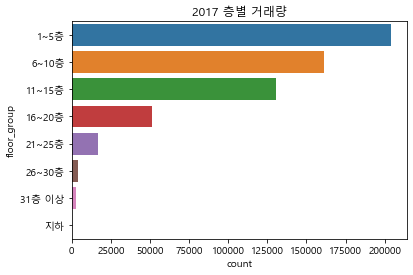

In [40]:
plt.title('2017 층별 거래량')
sns.countplot(y='floor_group', data=apt2017, order=apt2017['floor_group'].value_counts().index)
plt.show()

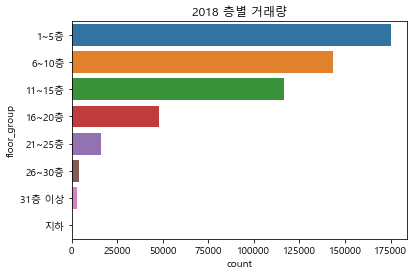

In [41]:
plt.title('2018 층별 거래량')
sns.countplot(y='floor_group', data=apt2018, order=apt2018['floor_group'].value_counts().index)
plt.show()

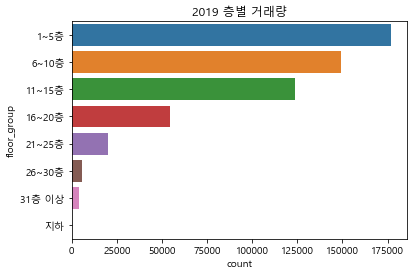

In [42]:
plt.title('2019 층별 거래량')
sns.countplot(y='floor_group', data=apt2019, order=apt2019['floor_group'].value_counts().index)
plt.show()

In [43]:
apt2017.groupby('floor_group')['거래금액(만원)'].mean().sort_values(ascending=False).to_frame()

,거래금액(만원)
floor_group,
31층 이상,78134.606664
지하,64619.230769
26~30층,60333.197988
21~25층,44966.771159
16~20층,37027.245189
11~15층,31856.647829
6~10층,31249.397777
1~5층,27353.397956


In [44]:
apt2017_floor = apt2017.groupby('층')['거래금액(만원)'].mean().sort_values(ascending=False).to_frame()
display(apt2017_floor)

,거래금액(만원)
층,
76,350340.000000
77,339690.000000
74,334990.000000
72,290506.666667
73,219820.000000
...,...
5,27861.612859
3,27731.668026
4,27703.237734


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

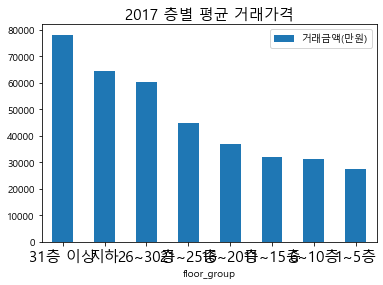

In [45]:
apt2017.groupby('floor_group')['거래금액(만원)'].mean().sort_values(ascending=False).to_frame().plot.bar()
plt.title('2017 층별 평균 거래가격', size=15)
plt.xticks(rotation=0)

In [46]:
apt2018.groupby('floor_group')['거래금액(만원)'].mean().sort_values(ascending=False).to_frame()

,거래금액(만원)
floor_group,
지하,150210.833333
31층 이상,78497.691822
26~30층,59512.325986
21~25층,45116.477978
16~20층,37887.947227
11~15층,32843.466605
6~10층,32022.757447
1~5층,28393.912590


In [47]:
apt2018_floor = apt2018.groupby('층')['거래금액(만원)'].mean().sort_values(ascending=False).to_frame()
display(apt2018_floor)

,거래금액(만원)
층,
-2,339000.000000
74,319940.000000
60,200125.000000
62,195200.000000
63,189200.000000
...,...
5,28904.498939
3,28814.076076
4,28544.187591


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

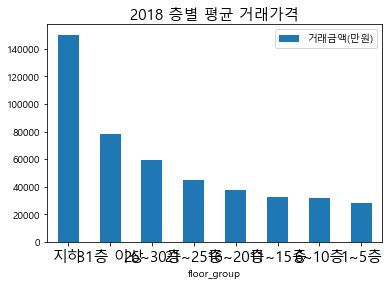

In [48]:
apt2018.groupby('floor_group')['거래금액(만원)'].mean().sort_values(ascending=False).to_frame().plot.bar()
plt.title('2018 층별 평균 거래가격', size=15)
plt.xticks(rotation=0)

In [49]:
apt2019.groupby('floor_group')['거래금액(만원)'].mean().sort_values(ascending=False).to_frame()

,거래금액(만원)
floor_group,
지하,95132.051282
31층 이상,74419.386223
26~30층,58876.604397
21~25층,47933.684624
16~20층,40109.719563
11~15층,35061.231660
6~10층,34297.066201
1~5층,30016.249233


In [50]:
apt2019_floor = apt2019.groupby('층')['거래금액(만원)'].mean().sort_values(ascending=False).to_frame()
display(apt2019_floor)

,거래금액(만원)
층,
-2,470333.333333
76,350340.000000
77,339690.000000
73,330640.000000
70,243546.666667
...,...
5,30597.999478
4,30539.649467
3,30236.832819


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

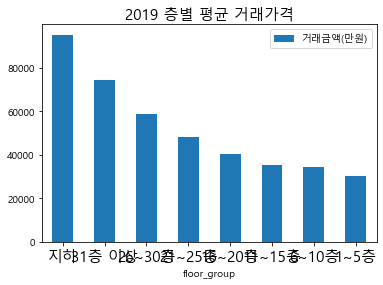

In [51]:
apt2019.groupby('floor_group')['거래금액(만원)'].mean().sort_values(ascending=False).to_frame().plot.bar()
plt.title('2019 층별 평균 거래가격', size=15)
plt.xticks(rotation=0)

### (6) 전용면적별(평수별) 거래량

In [52]:
apt171819['전용면적 반올림'] = round(apt171819['전용면적(㎡)'])
volume_by_total_surface = apt171819.groupby('전용면적 반올림').count()
volume_by_total_surface['전용면적별 거래량'] = volume_by_total_surface['거래금액(만원)']
volume_by_total_surface = volume_by_total_surface.loc[:,['전용면적별 거래량']]
volume_by_total_surface = volume_by_total_surface.sort_values('전용면적별 거래량', ascending=False)
volume_by_total_surface  # 85㎡ - 약 25~6평/ 60㎡ - 약 18평 정도 거래량이 월등히 많음

,전용면적별 거래량
전용면적 반올림,
85.0,483387
60.0,297215
50.0,53641
59.0,53315
84.0,50629
...,...
253.0,1
258.0,1
266.0,1


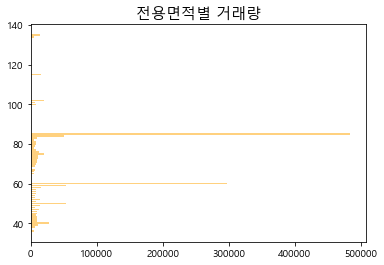

In [53]:
volume_by_total_surface_top50 = volume_by_total_surface.iloc[:50]
volume_by_total_surface_top50
plt.rc('font', family='Malgun Gothic')
plt.title("전용면적별 거래량",size=15)
plt.barh(volume_by_total_surface_top50.index, volume_by_total_surface_top50['전용면적별 거래량'], color='orange', alpha = 0.5)
plt.show() # 주로 40㎡(12평) ~ 90㎡ (27평) 사이의 아파트가 많이 거래됨

#### - 변수간 상관관계 정리

In [54]:
corr2017 = apt2017.corr(method='pearson')
corr2017

,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,시도별거래량
부번,1.000000,-0.013196,-0.009791,-0.000737,-0.016739,-0.020545,-0.037810,-0.024697
전용면적(㎡),-0.013196,1.000000,0.045462,0.009583,0.540676,0.170594,0.223751,0.102612
계약년월,-0.009791,0.045462,1.000000,0.043561,0.069904,0.018489,0.039897,0.008998
계약일,-0.000737,0.009583,0.043561,1.000000,0.025497,0.001487,0.001163,0.010510
거래금액(만원),-0.016739,0.540676,0.069904,0.025497,1.000000,0.182033,0.126213,0.326521
층,-0.020545,0.170594,0.018489,0.001487,0.182033,1.000000,0.266306,0.043832
건축년도,-0.037810,0.223751,0.039897,0.001163,0.126213,0.266306,1.000000,-0.017773
시도별거래량,-0.024697,0.102612,0.008998,0.010510,0.326521,0.043832,-0.017773,1.000000


거래금액과 전용면적이 0.54 정도의 양의 상관관계. 그 다음으로 비교적 유의미한 수치로는 거래금액과 층이 0.18 정도의 양의 상관관계를 가짐.
층 & 건축년도 -> 0.26 정도의 양의 상관관계

In [55]:
corr2018 = apt2018.corr(method='pearson')
corr2018

,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,시도별거래량
부번,1.000000,-0.010992,0.003070,-0.000584,-0.007157,-0.022424,-0.029309,-0.019495
전용면적(㎡),-0.010992,1.000000,-0.014584,-0.002072,0.516266,0.162351,0.207289,0.110152
계약년월,0.003070,-0.014584,1.000000,-0.020789,-0.055325,0.003869,0.027028,-0.010007
계약일,-0.000584,-0.002072,-0.020789,1.000000,0.000006,-0.004645,-0.008210,-0.006155
거래금액(만원),-0.007157,0.516266,-0.055325,0.000006,1.000000,0.175313,0.141065,0.260931
층,-0.022424,0.162351,0.003869,-0.004645,0.175313,1.000000,0.271603,0.048815
건축년도,-0.029309,0.207289,0.027028,-0.008210,0.141065,0.271603,1.000000,0.009213
시도별거래량,-0.019495,0.110152,-0.010007,-0.006155,0.260931,0.048815,0.009213,1.000000


In [56]:
corr2019 = apt2019.corr(method='pearson')
corr2019

,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,시도별거래량
부번,1.000000,-0.013994,-0.002504,-0.002314,-0.008240,-0.022038,-0.024455,-0.010222
전용면적(㎡),-0.013994,1.000000,0.057538,0.003085,0.456091,0.165724,0.179345,0.075043
계약년월,-0.002504,0.057538,1.000000,-0.019335,0.138798,0.043586,0.059220,0.074779
계약일,-0.002314,0.003085,-0.019335,1.000000,0.001623,0.001069,0.005171,-0.000699
거래금액(만원),-0.008240,0.456091,0.138798,0.001623,1.000000,0.165782,0.113623,0.237718
층,-0.022038,0.165724,0.043586,0.001069,0.165782,1.000000,0.291626,0.027205
건축년도,-0.024455,0.179345,0.059220,0.005171,0.113623,0.291626,1.000000,-0.004981
시도별거래량,-0.010222,0.075043,0.074779,-0.000699,0.237718,0.027205,-0.004981,1.000000


2017, 2018, 2019 년 모두 거래금액과 다른 변수와의 상관관계를 따져보았을 때, 유의미한 양의 상관관계로는 비교적 전용면적이 가장 높고 그리고 그 다음으로는 층임.
(+) 층 & 건축년도 사이에도 양의 상관관계가 보임.

## 지역간 비교

### (1) 수도권 / 비수도권 간 비교

In [57]:
#수도권, 비수도권 나누기
apt2017_cap = apt2017[(apt2017['도'] == '경기도') | (apt2017['도'] == '서울특별시') | (apt2017['도'] == '인천광역시')]
apt2017_notcap = apt2017[(apt2017['도'] != '경기도') & (apt2017['도'] != '서울특별시') & (apt2017['도'] != '인천광역시')]

apt2018_cap = apt2018[(apt2018['도'] == '경기도') | (apt2018['도'] == '서울특별시') | (apt2018['도'] == '인천광역시')]
apt2018_notcap = apt2018[(apt2018['도'] != '경기도') & (apt2018['도'] != '서울특별시') & (apt2018['도'] != '인천광역시')]

apt2019_cap = apt2019[(apt2019['도'] == '경기도') | (apt2019['도'] == '서울특별시') | (apt2019['도'] == '인천광역시')]
apt2019_notcap = apt2019[(apt2019['도'] != '경기도') & (apt2019['도'] != '서울특별시') & (apt2019['도'] != '인천광역시')]

In [58]:
#3개년 데이터 통합하기
apt_3years = pd.concat([apt2017,apt2018,apt2019])
apt_cap_3y = pd.concat([apt2017_cap,apt2018_cap,apt2019_cap])
apt_notcap_3y = pd.concat([apt2017_notcap,apt2018_notcap,apt2019_notcap])

In [59]:
#수도권, 비수도권 표현하는 변수 만들기
apt_3years['is_cap']=0
apt_3years.loc[(apt_3years['도'] == '경기도') | (apt_3years['도'] == '서울특별시') | (apt_3years['도'] == '인천광역시') , 'is_cap'] = '수도권'
apt_3years.loc[(apt_3years['도'] != '경기도') & (apt_3years['도'] != '서울특별시') & (apt_3years['도'] != '인천광역시') , 'is_cap'] = '비수도권'

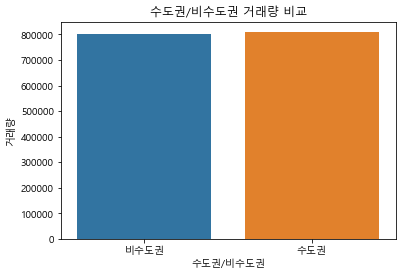

In [60]:
#3개년 수도권/비수도권 거래량 비교
sns.countplot(x="is_cap", data=apt_3years)
plt.title("수도권/비수도권 거래량 비교")
plt.xlabel('수도권/비수도권')
plt.ylabel('거래량')
plt.show()

수도권과 비수도권의 거래량이 비슷하다. 심지어 수도권의 거래량이 조금 더 많았다. 전국에 17개의 시,도가 있고 그 중의 3개(서울특별시, 경기도, 인천광역시)만이 수도권이고, 나머지 14개의 시,도가 비수도권임을 감안하면 수도권의 평균 거래량이 월등히 높다고 볼 수 있다.

In [61]:
#수도권/비수도권 면적당 거래금액 비교
apt_3years["면적당거래금액"] = apt_3years["거래금액(만원)"] / apt_3years["전용면적(㎡)"] 
apt_cap_3y["면적당거래금액"] = apt_cap_3y["거래금액(만원)"] / apt_cap_3y["전용면적(㎡)"]
apt_notcap_3y["면적당거래금액"] = apt_notcap_3y["거래금액(만원)"] / apt_notcap_3y["전용면적(㎡)"]

Text(0.5, 0, '면적당 거래금액(만원)')

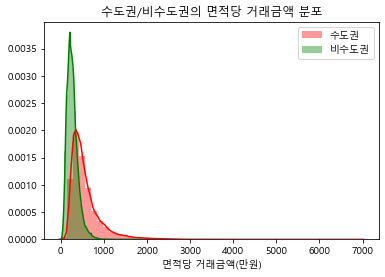

In [62]:
sns.distplot(apt_cap_3y["면적당거래금액"],color="red",label="수도권")
sns.distplot(apt_notcap_3y["면적당거래금액"],color="green",label="비수도권")
plt.title("수도권/비수도권의 면적당 거래금액 분포")
plt.legend()
plt.xlabel('면적당 거래금액(만원)')

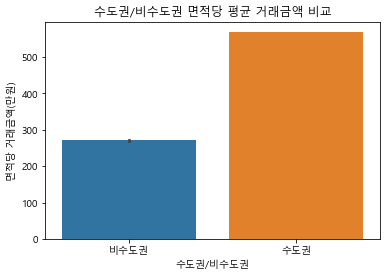

In [63]:
#수도권/비수도권의 면적당 평균 거래금액 비교
sns.barplot(x="is_cap", y="면적당거래금액", data=apt_3years)
plt.title("수도권/비수도권 면적당 평균 거래금액 비교")
plt.xlabel('수도권/비수도권')
plt.ylabel('면적당 거래금액(만원)')
plt.show()

수도권의 면적당 거래금액 평균이 비수도권보다 약 2배 이상 높다.

In [64]:
#수도권에서 가장 면적당 거래금액이 높은 매물 찾기
apt_cap_3y.loc[apt_cap_3y['면적당거래금액'].idxmax()]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,도,시/구,동,계약년월1,계약연도,계약월,시도별거래량,floor_group,면적당거래금액
42841,인천광역시 부평구 청천동,259-5,259,5,미도7,59.7000,201703,19,17000,2,...,원길로24번길 5,인천광역시,부평구,청천동,201703,2017,03,36600,1~5층,284.757119
42841,서울특별시 성북구 보문동6가,458,458,0,보문파크뷰자이,29.9600,201705,25,13472,8,...,보문사길 111,서울특별시,성북구,보문동6가,201705,2017,05,105076,6~10층,449.666222
42841,서울특별시 동대문구 전농동,690,690,0,래미안 크레시티,84.9600,201706,17,67000,12,...,사가정로 65,서울특별시,동대문구,전농동,201706,2017,06,105076,11~15층,788.606403
42841,서울특별시 동대문구 휘경동,109,109,0,롯데낙천대,82.8200,201707,29,39100,19,...,외대역동로1길 24,서울특별시,동대문구,휘경동,201707,2017,07,105076,16~20층,472.108186
42841,인천광역시 남동구 만수동,1115-1,1115,1,향촌휴먼시아,59.6800,201801,13,26400,1,...,만수서로 55,인천광역시,남동구,만수동,201801,2018,01,30384,1~5층,442.359249
42841,서울특별시 중랑구 신내동,397,397,0,동성1,65.5600,201803,13,30800,13,...,신내로 128,서울특별시,중랑구,신내동,201803,2018,03,81388,11~15층,469.798658
42841,서울특별시 성동구 금호동4가,235,235,0,서울숲푸르지오2차,59.8620,201808,15,95500,12,...,금호로 17,서울특별시,성동구,금호동4가,201808,2018,08,81388,11~15층,1595.335939
42841,인천광역시 남동구 구월동,23,23,0,구월힐스테이트1단지,83.7769,201809,7,35000,5,...,구월로 192,인천광역시,남동구,구월동,201809,2018,09,30384,1~5층,417.776261
42841,서울특별시 노원구 상계동,1276,1276,0,청암2단지,49.7700,201910,14,31500,11,...,덕릉로94가길 20,서울특별시,노원구,상계동,201910,2019,10,74903,11~15층,632.911392
42841,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,35.8700,201912,21,250000,5,...,개포로 310,서울특별시,강남구,개포동,201912,2019,12,74903,1~5층,6969.612490


수도권에서 면적당 거래금액이 가장 높은 매물은 서울특별시 강남구 개포동에 위치한 개포주공 1단지였다. 약 10평에 거래금액이 25억정도로, 면적당 거래금액이 6969만원이었다.

In [65]:
#비수도권에서 가장 면적당 거래금액이 높은 매물 찾기
apt_notcap_3y.loc[apt_notcap_3y['면적당거래금액'].idxmax()]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,도,시/구,동,계약년월1,계약연도,계약월,시도별거래량,floor_group,면적당거래금액
33300,부산광역시 동래구 온천동,1412-1,1412,1,반도보라스카이뷰,101.4053,201706,24,49800,39,...,아시아드대로 234,부산광역시,동래구,온천동,201706,2017,06,37938,31층 이상,491.098591
33300,부산광역시 북구 덕천동,357-1,357,1,덕천시영,40.0700,201707,18,16500,5,...,의성로95번길 105,부산광역시,북구,덕천동,201707,2017,07,37938,1~5층,411.779386
33300,부산광역시 해운대구 우동,1407,1407,0,해운대두산위브더제니스,222.5998,201803,12,414340,68,...,마린시티2로 33,부산광역시,해운대구,우동,201803,2018,03,25843,31층 이상,1861.367351
33300,충청남도 서산시 예천동,1270-1,1270,1,서산 예천 푸르지오,73.1370,201804,27,26500,19,...,호수공원11로 11,충청남도,서산시,예천동,201804,2018,04,18927,16~20층,362.333703
33300,전라북도 전주덕진구 인후동1가,918-1,918,1,아중마을부영(6차),84.8246,201805,29,19000,9,...,무삼지로 10,전라북도,전주덕진구,인후동1가,201805,2018,05,17861,6~10층,223.991625
33300,전라남도 여수시 화장동,740,740,0,무선주공2차,58.1400,201806,24,8850,3,...,무선2길 39,전라남도,여수시,화장동,201806,2018,06,17093,1~5층,152.218782
33300,전라북도 전주덕진구 반월동,422-1,422,1,대창하이빌타운,28.7100,201807,17,3150,1,...,반월4길 15,전라북도,전주덕진구,반월동,201807,2018,07,17861,1~5층,109.717868
33300,부산광역시 북구 화명동,2324,2324,0,화명롯데캐슬카이저,131.7800,201809,10,58000,24,...,금곡대로 166,부산광역시,북구,화명동,201809,2018,09,25843,21~25층,440.127485
33300,울산광역시 남구 신정동,318,318,0,울산신정푸르지오,71.1160,201810,19,34000,5,...,팔등로 85,울산광역시,남구,신정동,201810,2018,10,8148,1~5층,478.092131
33300,충청북도 충주시 연수동,930,930,0,세원,59.5200,201903,1,5900,6,...,번영대로 120,충청북도,충주시,연수동,201903,2019,03,17151,6~10층,99.126344


비수도권에서 면적당 거래금액이 가장 높은 매물은 부산광역시 해운대구 우동에 위치한 해운대두산위브더제니스였다. 약 67평에 거래금액이 41억 4천만원정도로, 면적당 거래금액이 1861만원이었다.
수도권에서 면적당 거래금액이 가장 높은 매물이 비수도권의 매물보다 약 3배이상 높았다.

### (2) 서울 / 경기 지역간 비교

In [66]:
#서울/경기 지역 데이터 추출
apt_Gyeongi_3y = apt_3years[(apt_3years['도'] == '경기도')]
apt_Seoul_3y = apt_3years[(apt_3years['도'] == '서울특별시')]
apt_SG_3y = apt_3years[(apt_3years['도'] == '서울특별시') | (apt_3years['도'] == '경기도')]

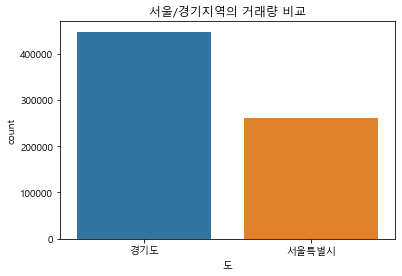

In [67]:
#서울/경기 지역 거래량 비교
sns.countplot(x="도", data=apt_SG_3y)
plt.title("서울/경기지역의 거래량 비교")
plt.xticks(rotation = 0)
plt.show()

경기도가 서울특별시보다 거래량이 약 1.5배가량 많았다.

In [68]:
#서울/경기 지역 거래금액 분포 비교
apt_Gyeongi_3y["면적당거래금액"] = apt_Gyeongi_3y["거래금액(만원)"] / apt_Gyeongi_3y["전용면적(㎡)"] 
apt_Seoul_3y["면적당거래금액"] = apt_Seoul_3y["거래금액(만원)"] / apt_Seoul_3y["전용면적(㎡)"]
apt_SG_3y["면적당거래금액"] = apt_SG_3y["거래금액(만원)"] / apt_SG_3y["전용면적(㎡)"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Text(0.5, 0, '면적당 거래금액(만원)')

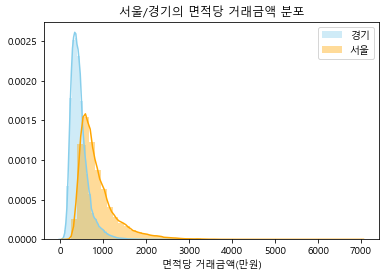

In [69]:
sns.distplot(apt_Gyeongi_3y["면적당거래금액"],color="skyblue",label="경기")
sns.distplot(apt_Seoul_3y["면적당거래금액"],color="orange",label="서울")
plt.title("서울/경기의 면적당 거래금액 분포")
plt.legend()
plt.xlabel('면적당 거래금액(만원)')

대체로 서울지역의 면적당 거래금액이 경기지역보다 더 높은것으로 나타났다. 경기지역의 면적당거래금액의 최빈값은 약 500만원이었고, 서울지역의 면적당거래금액의 최빈값은 약 800만원이었다.